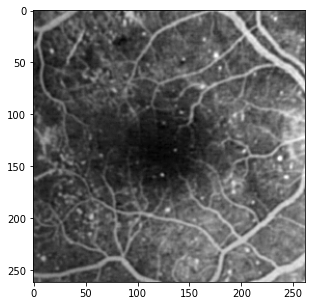

In [68]:
import csv
from numpy import genfromtxt
my_data = genfromtxt('f3.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)


In [59]:
with open('f2.txt','r') as f1_csv:
    csv_reader = csv.reader(f1_csv)
    for line in csv_reader:
        print(line)

['2', ' 4', ' 5', ' 5', ' 3']
['1', ' 0', ' 5', ' 5', ' 5']
['3', ' 2', ' 3', ' 4', ' 5']
['1', ' 2', ' 3', ' 4', ' 0']
['4', ' 4', ' 4', ' 4', ' 3']


In [73]:
dig = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
np.flip(dig, 0)

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [61]:
f1 = np.array(
        [
            [2, 4, 5, 5, 3],
            [1, 0, 5, 5, 5],
            [3, 2, 3, 4, 5],
            [1, 2, 3, 4, 0],
            [4, 4, 4, 4, 3]
        ])  
    
# print(f1_with_boundary)
# making element a 
a = np.array([
                        [0,1,0],
                        [0,5,0],
                        [0,1,0]])
# img element b
b = np.array([
                        [1,1,1],
                        [1,1,0],
                        [1,1,1]])

c = b -a  
print(c)
# padding_y , padding_x = square_three_ones.shape[0]//2, square_three_ones.shape[1]//2 
# f1_with_boundary = np.pad(f1, ((padding_y, padding_y),(padding_x, padding_x)), mode='constant', constant_values=1)
# print(f1_with_boundary)
np.any(c<0)
itemindex = np.argwhere(b==0)
for item in itemindex  :
    print("y->", item[0],"x->", item[1])
    
np.max(a)

[[ 1  0  1]
 [ 1 -4  0]
 [ 1  0  1]]
y-> 1 x-> 2


5

rough code above
## Actuall code below :)

f1: 
 [[ 55  56  56 ...  61  60  59]
 [ 50  51  54 ...  71  70  69]
 [ 49  46  49 ...  66  64  60]
 ...
 [ 57  65  63 ... 113 118 128]
 [ 66  71  70 ... 132 143 155]
 [ 63  71  70 ... 152 173 182]] 

f1_boundary: 
 [[211 211 211 ... 211 211 211]
 [211  55  56 ...  60  59 211]
 [211  50  51 ...  70  69 211]
 ...
 [211  66  71 ... 143 155 211]
 [211  63  71 ... 173 182 211]
 [211 211 211 ... 211 211 211]] 

f1_eroded: 
 [[ 50  50  51 ...  60  59  59]
 [ 46  46  46 ...  60  59  59]
 [ 41  41  41 ...  55  50  50]
 ...
 [ 57  57  60 ... 102 102 109]
 [ 57  57  60 ... 113 113 118]
 [ 63  63  65 ... 132 132 143]] 



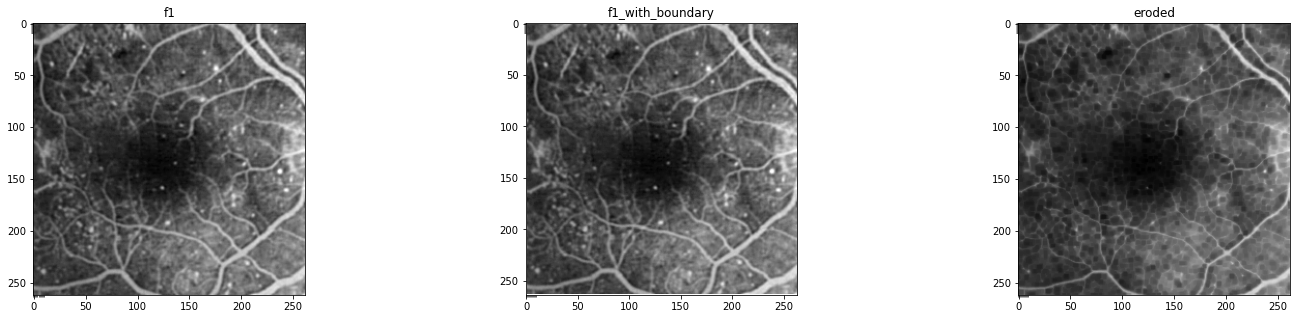

In [71]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from numpy import genfromtxt
plt.rcParams["figure.figsize"] = (25,5)



def erosion_f1(): 
# Question 1    
#     f1 = np.array(
#             [[1, 1, 1, 1, 1], 
#             [1, 0, 1, 1, 1],
#             [1, 1, 1, 1, 1],
#             [1, 0, 1, 1, 1],
#             [1, 1, 1, 1, 1]])       

# Question 2
#     f1 = np.array(
#             [
#                 [2, 4, 5, 5, 3],
#                 [1, 0, 5, 5, 5],
#                 [3, 2, 3, 4, 5],
#                 [1, 2, 3, 4, 0],
#                 [4, 4, 4, 4, 3]
#             ])  

# Question 3
    f1 = genfromtxt('f3.txt', delimiter=',').astype(int)
    vmax = np.max(f1)
    
    
    ##----------------------------------------------------
    SE = np.array([
                            [1],
                            [1],
                            [1]])
    
    ##----------------------------------------------------
    SE_y = SE.shape[0]
    SE_x = SE.shape[1]
    
    
    padding_y , padding_x = SE.shape[0]//2, SE.shape[1]//2 
    f1_with_boundary = np.pad(f1, ((padding_y, padding_y),(padding_x, padding_x)), mode='constant', constant_values=vmax)
    f1_subarr = []
    f1_erosion = np.zeros((f1.shape[0], f1.shape[1]), int)
    
    # get the idx of the 1s in the SE
    SE_one_idxs = np.argwhere(SE==1)
   
   # find sub-matrices inside the original matrix which are identical to the erosion matrix
    for i in range(f1.shape[0]):
        for j in range(f1.shape[1]):
            f1_subarr =  f1_with_boundary[i:i+SE_y, j:j+SE_x]
            f1_subarr_filtered = []
            # iterate through the idxes 1s in the masking SE elements
            for one_idx in SE_one_idxs:
                f1_subarr_filtered.append(f1_subarr[one_idx[0],one_idx[1]])
            f1_erosion[i,j]=np.amin(f1_subarr_filtered)

    print("f1: \n",f1 , end = ' \n\n')
    print("f1_boundary: \n",f1_with_boundary, end = ' \n\n')
    print("f1_eroded: \n",f1_erosion, end = ' \n\n')

    # plot main images
    plt.subplot(1,3,1)
    # grid for the image 
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
#     ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    
    plt.imshow(f1, cmap='gray',vmin=0,vmax=vmax)
    plt.title('f1')
#     plt.axis('off')

    # Plot the bordered image
    plt.subplot(1,3,2)
    # grid for the image 
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
#     ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    
    plt.imshow(f1_with_boundary, cmap='gray', vmin=0,vmax=vmax)
    plt.title('f1_with_boundary')
#     plt.axis('off')

    # Plot the exepected output
    plt.subplot(1,3,3)
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
#     ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    
    plt.imshow(f1_erosion, cmap='gray',vmin=0,vmax=vmax)
    plt.title('eroded')
#     plt.axis('off')
    plt.show()

if __name__ == "__main__":
    erosion_f1()